In [42]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [53]:
# Spring parameters:
num_springs = 3

# TODO: Make all for loops one big loop for easier input

# num_springs =  input("Number of springs to consider?")

# Get Spring Constants:
spring_const = [1,1,1]

#Left unimplemented for bug fixing sanity
#for i in range(num_springs):
#    kn = input(r"Spring constant of spring {i}:")
#    spring_const.append(float(kn))

anchor_pts = [[-1,2],[-1,2],[0,2]]
#for i in range(num_springs):
#    xn = input(r"x position of spring {i}:")
#    yn = input(r"y position of spring {i}")
#    anchor_pts.append([float(xn),float(yn)])


natural_len = [1,1,1]
#for i in range(num_springs):
#    Ln = input(r"Natural length of spring {i}:")
#    natural_len.append(float(Ln))

# Bundle parameters into standard list
spring_params = []
for i in range(num_springs):
    temp = []
    temp.append(anchor_pts[i])
    temp.append(spring_const[i])
    temp.append(natural_len[i])
    spring_params.append(temp)

for i in range(num_springs):
    print(spring_params[i][0])

[-1, 2]
[-1, 2]
[0, 2]


In [44]:
# Mass parameters:
m = 1

# m = input(r"Input mass of spring:")

rx0 = -1.5
ry0 = 1.5

vx0 = 0
vy0 = 0

# rx0 = input(r"Input initial x position of spring")
# rx0 = input(r"Input initial y position of spring")
# vx0 = input(r"Input initial x velocity of spring")
# vy0 = input(r"Input initial x velocity of spring")

# Bundle parameters into standard list
mass_params = [[float(rx0),float(ry0)],[float(vx0),float(vy0)],m]
mass_params[0]

[-1.5, 1.5]

In [45]:
# Simulation parameters:
t0 = 0
tf = 10
dt = 0.1

In [46]:
def force(spring_num):
    # Get spring stretch from equilibrium 
    x_stretch = spring_params[spring_num][0][0] - mass_params[0][0]
    y_stretch = spring_params[spring_num][0][1] - mass_params[0][1]
    stretch = np.sqrt(x_stretch**2+y_stretch**2) - spring_params[spring_num][2]

    # Get direction of force
    x_dist = mass_params[0][0] - spring_params[spring_num][0][0]
    y_dist = mass_params[0][1] - spring_params[spring_num][0][1] 
    l = np.sqrt(x_dist**2 + y_dist**2)
    if l==0:
        l = 1e-2
    unit_vec = [x_dist / l,y_dist / l]
    force_x = -spring_params[spring_num][1] * stretch * unit_vec[0]
    force_y = -spring_params[spring_num][1] * stretch * unit_vec[1]
    return [force_x,force_y]

In [47]:
def euler():
    t = t0
    m_pos_x = [mass_params[0][0]]
    m_pos_y = [mass_params[0][1]]

    while t < tf:
        net_force = [0,0]

        for spring_num in range(0,num_springs):
            temp_force = force(spring_num)
            net_x = net_force[0] + temp_force[0]
            net_y = net_force[1] + temp_force[1]
            net_force = [net_x,net_y]
        vnx = net_force[0] * dt / m + mass_params[1][0]
        vny = net_force[1] * dt / m + mass_params[1][1]

        mass_params[1][0] = vnx
        mass_params[1][1] = vny

        rnx = vnx * dt + mass_params[0][0]
        rny = vny * dt + mass_params[0][1]
        mass_params[0][0] = rnx
        mass_params[0][1] = rny 
        
        m_pos_x.append(rnx)
        m_pos_y.append(rny)
        
        t += dt

    return [m_pos_x, m_pos_y]

In [54]:
def animation_dots(method):
    points = method()
    x = points[0]
    y = points[1]

    fig, ax = plt.subplots()

    dot, = ax.plot(x[0], y[0], 'ko')


    for i in range(num_springs):
        x_pos = spring_params[i][0][0]
        y_pos = spring_params[i][0][1]
        ax.plot(x_pos, y_pos, 'ro') 

    ax.set_xlim(min(x)-0.1, max(x)+0.1)
    ax.set_ylim(min(y)-0.1, max(y)+0.1)

    def update(num, x, y, dot):
        dot.set_data([x[num]], [y[num]])
        return dot,


    ani = animation.FuncAnimation(fig, update, len(x), interval=100, 
                              fargs=[x, y, dot], blit=True)

    ani.save('animation_drawing.gif', writer='imagemagick', fps=60)


In [51]:
def animation_line(method):
    points = method()
    x = points[0]
    y = points[1]

    fig, ax = plt.subplots()
    line, = ax.plot(x, y)

    for i in range(num_springs):
        x_pos = spring_params[i][0][0]
        y_pos = spring_params[i][0][1]
        ax.plot(x_pos, y_pos, 'ro') 
        
    def update(num, x, y, line):
        line.set_data(x[:num], y[:num])
        return line,

    ani = animation.FuncAnimation(fig, update, len(x), interval=100, 
                              fargs=[x, y, line], blit=True)
    ani.save('animation_drawing.gif', writer='imagemagick', fps=60)

MovieWriter imagemagick unavailable; using Pillow instead.


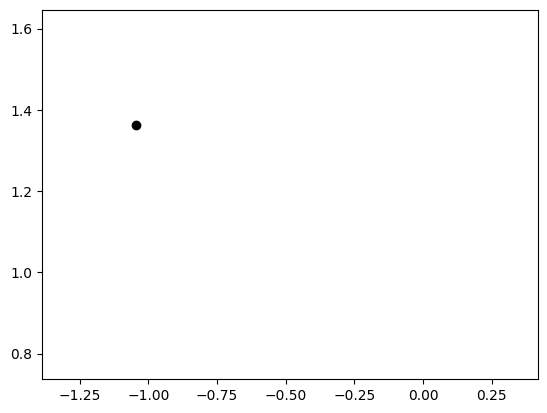

In [55]:
animation_dots(euler)

MovieWriter imagemagick unavailable; using Pillow instead.


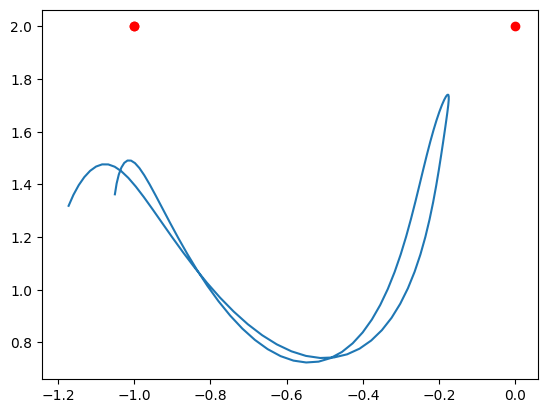

In [52]:
animation_line(euler)